In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

In [2]:
!pip install statsmodels


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
datos = pd.DataFrame({
    'habitaciones': [2, 3, 4, 5, 3, 4, 2, 3, 5, 4],
    'tamaño_m2': [50, 75, 100, 120, 80, 95, 60, 78, 130, 110],
    'antigüedad_años': [10, 15, 20, 25, 18, 12, 8, 17, 30, 22],
    'distancia_al_centro_km': [5, 7, 10, 12, 6, 8, 4, 9, 15, 11],
    'precio': [150, 200, 250, 300, 220, 230, 160, 210, 310, 280]
})

In [4]:
vInd = datos[['habitaciones', 'tamaño_m2', 'antigüedad_años', 'distancia_al_centro_km']]
vDep = datos['precio']

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vConst = add_constant(vInd)
vif_datos = pd.DataFrame()

vif_datos['Nombre Variables'] = vConst.columns
vif_datos['VIF'] = [variance_inflation_factor(vConst.values, i) for i in range(vConst.shape[1])]

vif_datos

,Nombre Variables,VIF
0,const,20.709748
1,habitaciones,28.696359
2,tamaño_m2,39.505117
3,antigüedad_años,9.123118
4,distancia_al_centro_km,14.035596


In [6]:
xInd_train, xInd_test, yDep_train, yDep_test = train_test_split(vInd, vDep, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(xInd_train)
x_test_scaled = scaler.transform(xInd_test)

print('Escalado de datos de prueba: ',x_test_scaled)
print('Escalado de datos de entrenamiento:', x_train_scaled)

Escalado de datos de prueba:  [[ 1.63784605  1.92117765  2.40535118  2.53426623]
 [-0.37796447 -0.51489776 -0.26726124 -0.41469811]]
Escalado de datos de entrenamiento: [[ 0.62994079  0.37094785 -0.80178373 -0.04607757]
 [-1.38586973 -1.62220476 -1.15813205 -1.15193919]
 [-0.37796447 -0.38202092  0.08908708  0.32254297]
 [ 0.62994079  0.59240925  0.62360956  0.69116352]
 [ 0.62994079  1.03533205  0.97995789  1.05978406]
 [-0.37796447 -0.29343636  0.26726124 -0.78331865]
 [ 1.63784605  1.47825485  1.51448037  1.4284046 ]
 [-1.38586973 -1.17928196 -1.51448037 -1.52055974]]


Text(0.5, 1.0, 'Regresion lineal multiple')

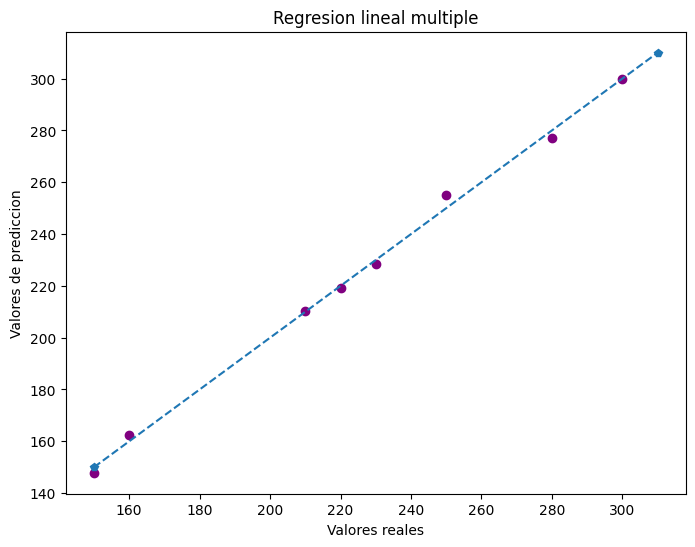

In [8]:
modelo = LinearRegression()
modelo.fit(x_train_scaled, yDep_train)

predicciones_rlm_train = modelo.predict(x_train_scaled)
predicciones_rlm_test = modelo.predict(x_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(yDep_train, predicciones_rlm_train, color='purple')

#LINEA DE IDENTIDAD
plt.plot(
    [vDep.min(), vDep.max()],
    [vDep.min(), vDep.max()], 'p--'
)

plt.xlabel('Valores reales')
plt.ylabel('Valores de prediccion')
plt.title('Regresion lineal multiple')

In [9]:
#Evaluar r2
r2_rlm = r2_score(yDep_test, modelo.predict(x_test_scaled))
print(r2_rlm)

0.9493863896779242


In [10]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

0.9554779596692216


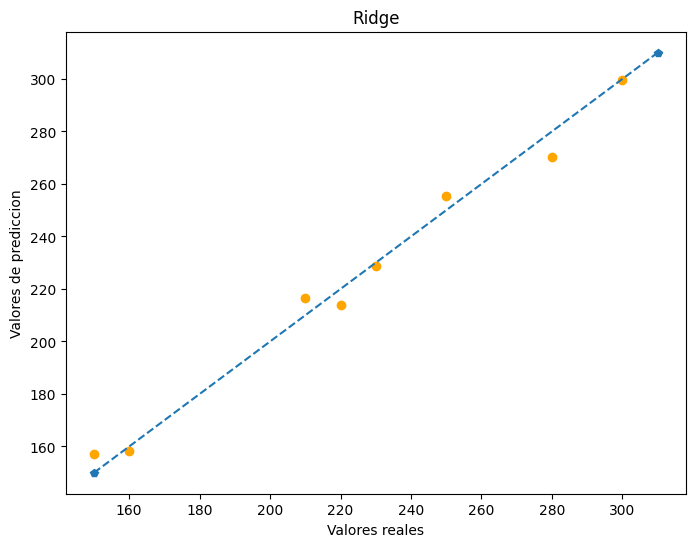

In [11]:
ridge_model.fit(x_train_scaled, yDep_train)

predicciones_rm_train = ridge_model.predict(x_train_scaled)
predicciones_rm_test = ridge_model.predict(x_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(yDep_train, predicciones_rm_train, color='orange')

#LINEA DE IDENTIDAD
plt.plot(
    [vDep.min(), vDep.max()],
    [vDep.min(), vDep.max()], 'p--'
)

plt.xlabel('Valores reales')
plt.ylabel('Valores de prediccion')
plt.title('Ridge')

r2_rlm = r2_score(yDep_test, ridge_model.predict(x_test_scaled))
print(r2_rlm)

0.94866679048774


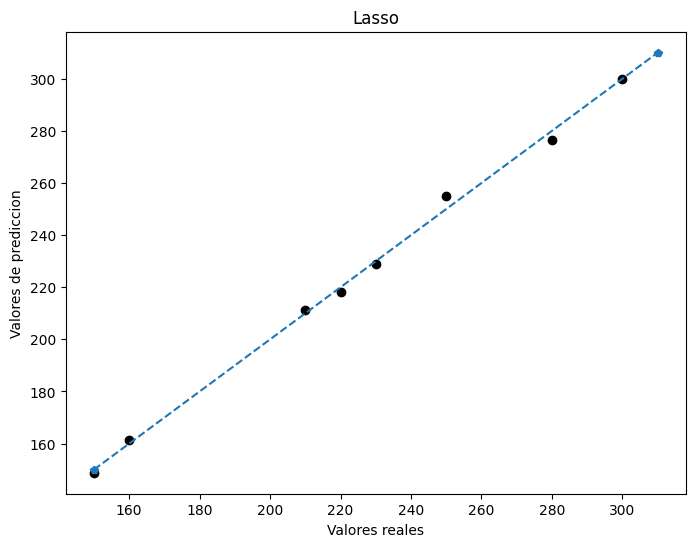

In [12]:
lasso_model.fit(x_train_scaled, yDep_train)

predicciones_lm_train = lasso_model.predict(x_train_scaled)
predicciones_lm_test = lasso_model.predict(x_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(yDep_train, predicciones_lm_train, color='black')

#LINEA DE IDENTIDAD
plt.plot(
    [vDep.min(), vDep.max()],
    [vDep.min(), vDep.max()], 'p--'
)

plt.xlabel('Valores reales')
plt.ylabel('Valores de prediccion')
plt.title('Lasso')

r2_rlm = r2_score(yDep_test, lasso_model.predict(x_test_scaled))
print(r2_rlm)

0.9822065418257412


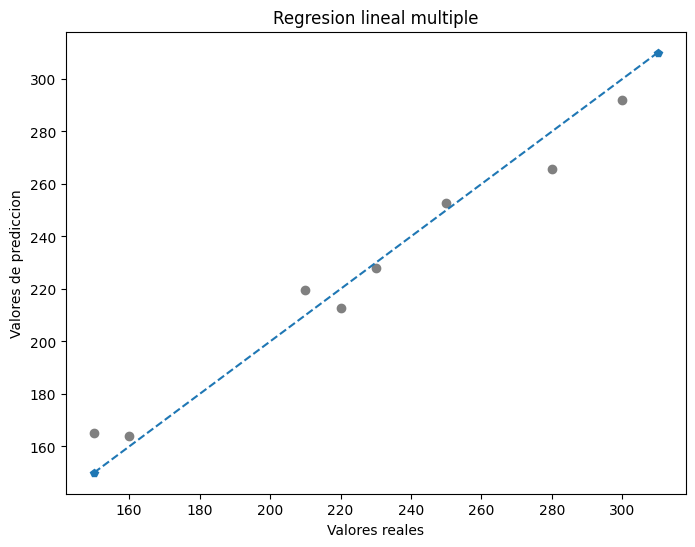

In [13]:
elastic_model.fit(x_train_scaled, yDep_train)

predicciones_em_train = elastic_model.predict(x_train_scaled)
predicciones_em_test = elastic_model.predict(x_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(yDep_train, predicciones_em_train, color='gray')

#LINEA DE IDENTIDAD
plt.plot(
    [vDep.min(), vDep.max()],
    [vDep.min(), vDep.max()], 'p--'
)

plt.xlabel('Valores reales')
plt.ylabel('Valores de prediccion')
plt.title('Regresion lineal multiple')

r2_rlm = r2_score(yDep_test, elastic_model.predict(x_test_scaled))
print(r2_rlm)

In [ ]:
#REVISIÓN DE LOS COEFICIENTES
